In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from uszipcode import SearchEngine
from sodapy import Socrata
from geopy.geocoders import Nominatim
import re

In [7]:
## get crime data
def getCrmieData():
    # Unauthenticated client only works with public data sets. Note 'None'
    # in place of application token, and no username or password:
    client = Socrata("data.lacity.org", None)

    # Example authenticated client (needed for non-public datasets):
    # client = Socrata(data.lacity.org,
    #                  MyAppToken,
    #                  userame="user@example.com",
    #                  password="AFakePassword")

    # First 2000 results, returned as JSON from API / converted to Python list of
    # dictionaries by sodapy.
    results = client.get("63jg-8b9z",limit= 3000000)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)
    return results_df
## get income data
def getIncomeData():
    #!/usr/bin/env python
    # make sure to install these packages before running:
    # pip install pandas
    # pip install sodapy

    # Unauthenticated client only works with public data sets. Note 'None'
    # in place of application token, and no username or password:
    client = Socrata("data.ftb.ca.gov", None)

    # Example authenticated client (needed for non-public datasets):
    # client = Socrata(data.ftb.ca.gov,
    #                  MyAppToken,
    #                  userame="user@example.com",
    #                  password="AFakePassword")

    # First 2000 results, returned as JSON from API / converted to Python list of
    # dictionaries by sodapy.
    results = client.get("mriu-wsxf", limit=1000000)

    # Convert to pandas DataFrame
    results_df = pd.DataFrame.from_records(results)
    return results_df

In [10]:
crimeData = getCrmieData()
incomeData = getIncomeData()

KeyboardInterrupt: 

In [2]:
crimeData = pd.read_csv('../data/Crime_Data_from_2010_to_Present.csv')
crimeData.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [112]:
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087209 entries, 0 to 2087208
Data columns (total 28 columns):
DR_NO             int64
Date Rptd         object
DATE OCC          object
TIME OCC          int64
AREA              int64
AREA NAME         object
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Crm Cd Desc       object
Mocodes           object
Vict Age          int64
Vict Sex          object
Vict Descent      object
Premis Cd         float64
Premis Desc       object
Weapon Used Cd    float64
Weapon Desc       object
Status            object
Status Desc       object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION          object
Cross Street      object
LAT               float64
LON               float64
dtypes: float64(8), int64(7), object(13)
memory usage: 445.9+ MB


In [113]:
crimeData.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087209e+06,2.087158e+06,701950.000000,2.087199e+06,137163.000000,3428.000000,104.000000,2.087209e+06,2.087209e+06
mean,1.473310e+08,1.360831e+03,1.108983e+01,1.155371e+03,1.445696e+00,5.071392e+02,3.178733e+01,3.108555e+02,371.311534,5.069659e+02,950.404971,971.832847,975.105769,3.406359e+01,-1.183083e+02
std,2.858894e+07,6.470280e+02,6.011671e+00,6.011796e+02,4.970424e-01,2.105088e+02,2.062928e+01,2.111787e+02,113.520211,2.103741e+02,125.741505,86.266833,81.276338,7.150007e-01,2.452697e+00
min,2.100000e+02,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214054e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401020e+01,-1.184365e+02
50%,1.506227e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.713210e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


# Crime Time Trend
We want to see how the number of crime changes over time, the total number of crime goes up or down for recent years.
Since the data is so large, we only focusing on the recent 5 years, from 2015 to 2019. Nov, we count the number of crimes by month.

In [6]:
# conver the type for date, from string toe datatime.
crimeData["DATE"] = pd.to_datetime(crimeData['DATE OCC'])
timeOccurences = crimeData[["DATE","Crm Cd"]]

# only draw from 2015 to 2019
filterData = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2019 12:00:00 AM']

filterData.reset_index(inplace=True)
filterData['DATE'] = filterData['DATE'].map(lambda x:x.strftime("%Y-%m"))
print(filterData)

            DATE  Crm Cd
0        2015-04     510
1        2015-07     510
2        2015-10     510
3        2015-08     510
4        2015-02     510
...          ...     ...
1089200  2019-03     648
1089201  2019-08     331
1089202  2019-01     930
1089203  2019-10     420
1089204  2019-02     330

[1089205 rows x 2 columns]


Text(0, 0.5, 'Number of crimes')

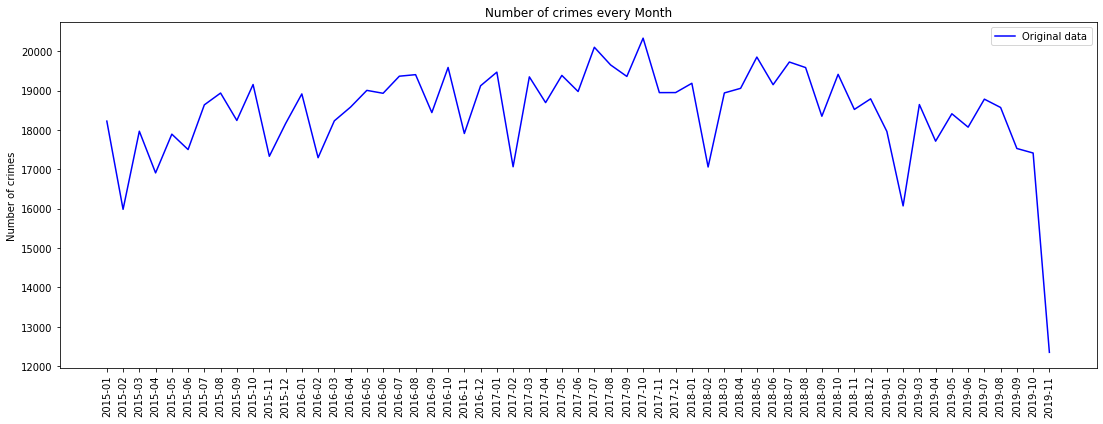

In [7]:
filterDataYearMonth = filterData.groupby('DATE').count()
fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(filterDataYearMonth, 
          c = 'blue', label = "Original data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes every Month")
axes.set_ylabel("Number of crimes")

Since the data is not complete for Nov. 2019, there may be a drop there.
From the graph, we can see that in a long time window, the number of crimes change periodically and few crimes happend in February every year. The overall trend is constant.

Then we focus on a specific year in 2015, to see how the number of crimes changes each day.

            Crm Cd
DATE              
2015-01-01    1428
2015-01-02     514
2015-01-03     495
2015-01-04     510
2015-01-05     629
...            ...
2015-12-27     502
2015-12-28     546
2015-12-29     514
2015-12-30     549
2015-12-31     625

[365 rows x 1 columns]


//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Number of crimes')

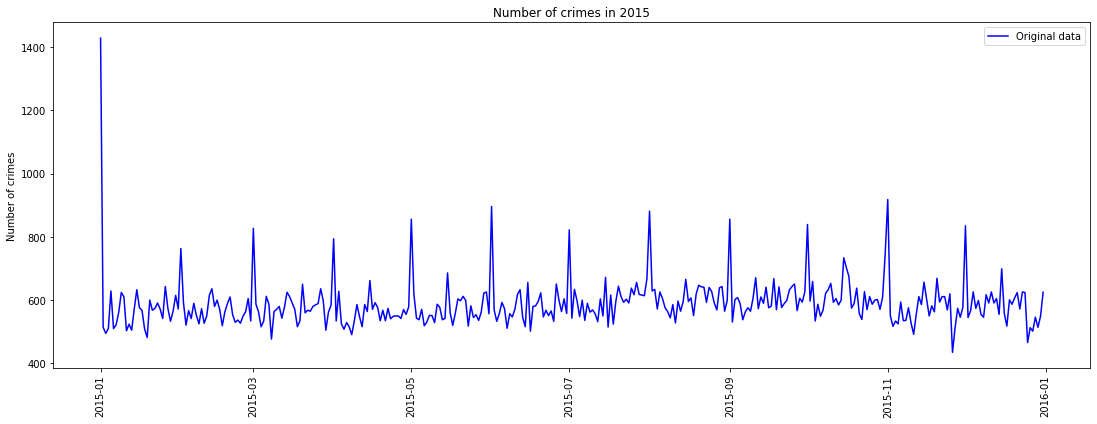

In [8]:

filterData2015 = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2015 12:00:00 AM']
filterData2015.reset_index(inplace=True)
filterData2015Count = filterData2015.groupby('DATE').count()
print(filterData2015Count.sort_values(by=['DATE']))

fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(filterData2015Count, 
          c = 'blue', label = "Original data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Number of crimes in 2015")
axes.set_ylabel("Number of crimes")


From the graph, we can see that the number of crimes is extremely high at the beginning of the year.
And the number of crimes is periodic fluctuations, like an electrocardiogram. It is slightly high at every beginning of the month.

Then we focus on a specific crime type which is CRIMINAL HOMICIDE (crime id == 110).

In [10]:
# Filter out the data
filterData2015 = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2015 12:00:00 AM']
filterData2015.reset_index(inplace=True)
killingData = filterData2015[filterData2015["Crm Cd"] == 110]
killingData1 = killingData[["DATE","Crm Cd"]].groupby('DATE').count()
print(killingData1)

            Crm Cd
DATE              
2015-01-01       1
2015-01-02       1
2015-01-03       1
2015-01-04       2
2015-01-06       1
...            ...
2015-12-22       2
2015-12-25       1
2015-12-27       1
2015-12-29       1
2015-12-30       1

[188 rows x 1 columns]


Text(0, 0.5, 'Number of crimes with Killing')

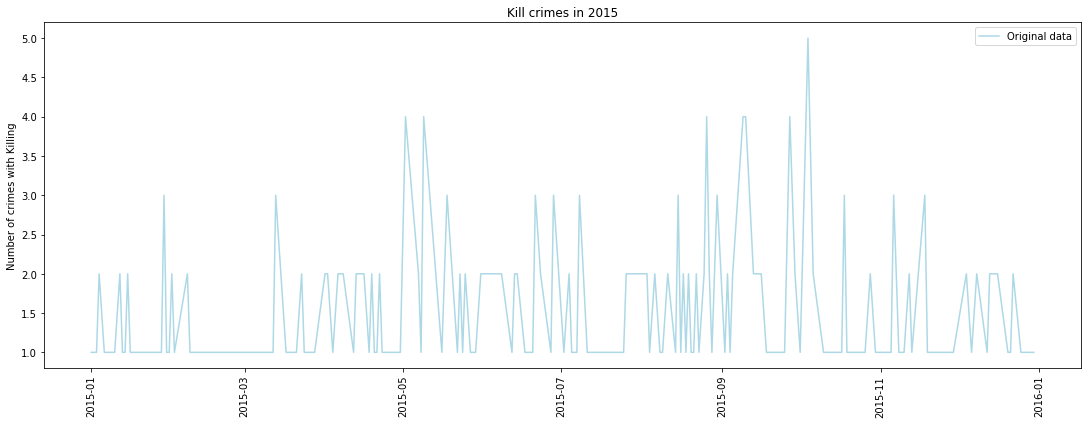

In [11]:
fig = plt.figure(figsize=(18,6))
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(killingData1, 
          c = 'lightblue', label = "Original data")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Kill crimes in 2015")
axes.set_ylabel("Number of crimes with Killing")


There are not that many homicides every day in 2015, on average around 3 every day in LA.

Then, let us see how it goes for every month in a larger time range.

            DATE  Crm Cd
0        2015-04     510
1        2015-07     510
2        2015-10     510
3        2015-08     510
4        2015-02     510
...          ...     ...
1089200  2019-03     648
1089201  2019-08     331
1089202  2019-01     930
1089203  2019-10     420
1089204  2019-02     330

[1089205 rows x 2 columns]


Text(0, 0.5, 'Number of crimes')

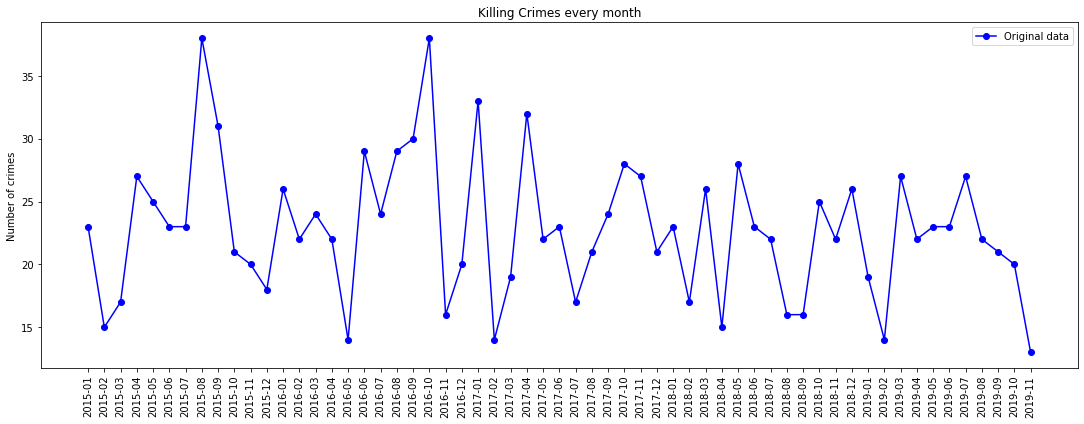

In [13]:
crimeData["DATE"] = pd.to_datetime(crimeData['DATE OCC'])
timeOccurences = crimeData[["DATE","Crm Cd"]]

# only draw from 2015 to 2019
filterData = timeOccurences.set_index("DATE").loc['01/01/2015 12:00:00 AM':'12/31/2019 12:00:00 AM']

filterData.reset_index(inplace=True)
filterData['DATE'] = filterData['DATE'].map(lambda x:x.strftime("%Y-%m"))
killingData = filterData[filterData["Crm Cd"] == 110]
print(filterData)

fig = plt.figure(figsize=(18,6))

axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(killingData.groupby('DATE').count(), 
          c = 'blue', label = "Original data",marker = "o")
plt.xticks(rotation = 90)
plt.legend()
axes.set_title("Killing Crimes every month")
axes.set_ylabel("Number of crimes")

On average, there will be around 25 number killing crimes happens every month, in a range between (10,40).

In [15]:
incomeData = pd.read_csv('../data/revised_tax_income.csv')
incomeData

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


In [121]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.reverse("34.089459,-118.328500")
location.raw["address"]#["postcode"]

{'house_number': '1015',
 'road': 'North Cahuenga Boulevard',
 'neighbourhood': 'Whitley Heights Historic District',
 'suburb': 'Hollywood',
 'city': 'Los Angeles',
 'county': 'Los Angeles County',
 'state': 'California',
 'postcode': '90038',
 'country': 'United States of America',
 'country_code': 'us'}

## Time Trend with tax income

We want to find whether they are a relationship between tax income and crime.
Since the crime table is so large, it will spend days to join the two table together, so here we only focus on two specific crime type which is homicide and robbery. 

In [16]:
seriousCrime = crimeData[crimeData["Crm Cd"] == 110]
seriousCrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE
113,100100811,04/16/2010 12:00:00 AM,04/16/2010 12:00:00 AM,510,1,Central,154,1,110,CRIMINAL HOMICIDE,...,Adult Arrest,110.0,NaN,NaN,NaN,500 S LOS ANGELES ST,NaN,34.0461,-118.2476,2010-04-16
404,100101605,11/15/2010 12:00:00 AM,11/14/2010 12:00:00 AM,1245,1,Central,157,1,110,CRIMINAL HOMICIDE,...,Adult Arrest,110.0,NaN,NaN,NaN,500 CROCKER ST,NaN,34.0435,-118.2427,2010-11-14
524,100104269,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,1030,1,Central,138,1,110,CRIMINAL HOMICIDE,...,Adult Arrest,110.0,NaN,NaN,NaN,400 E 4TH ST,NaN,34.0458,-118.2430,2010-01-05
2488,100110330,05/05/2010 12:00:00 AM,01/15/2010 12:00:00 AM,1200,1,Central,134,1,110,CRIMINAL HOMICIDE,...,Invest Cont,110.0,NaN,NaN,NaN,300 S HILL ST,NaN,34.0517,-118.2491,2010-01-15
3459,100112967,06/24/2010 12:00:00 AM,06/24/2010 12:00:00 AM,2000,1,Central,166,1,110,CRIMINAL HOMICIDE,...,Adult Arrest,110.0,NaN,NaN,NaN,7TH ST,SAN JULIAN,34.0407,-118.2468,2010-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084399,191300596,03/10/2019 12:00:00 AM,03/10/2019 12:00:00 AM,24,13,Newton,1321,1,110,CRIMINAL HOMICIDE,...,Invest Cont,110.0,998.0,NaN,NaN,200 E ADAMS BL,NaN,34.0289,-118.2686,2019-03-10
2086110,191200746,09/13/2019 12:00:00 AM,09/13/2019 12:00:00 AM,1426,12,77th Street,1253,1,110,CRIMINAL HOMICIDE,...,Adult Arrest,110.0,NaN,NaN,NaN,1700 W FLORENCE AV,NaN,33.9746,-118.3068,2019-09-13
2086120,191221484,08/29/2019 12:00:00 AM,08/29/2019 12:00:00 AM,1120,12,77th Street,1256,1,110,CRIMINAL HOMICIDE,...,Invest Cont,110.0,NaN,NaN,NaN,FLOWER ST,74TH ST,33.9727,-118.2813,2019-08-29
2086658,190407949,04/01/2019 12:00:00 AM,04/01/2019 12:00:00 AM,1457,4,Hollenbeck,424,1,110,CRIMINAL HOMICIDE,...,Invest Cont,110.0,998.0,NaN,NaN,3500 VALLEY BL,NaN,34.0700,-118.1998,2019-04-01


In order to combine these data together, we want to use the zip code to do this. The crime table contains the latitude and longitude of where the crime happens, and the tax table contains the tax income for each zip code in LA. So we need to figure out a way to translate a coordinate (lat and long) to a zip code.

First, we try geopy library, which is a library to locate the coordinates of addresses, cities, countries, and landmarks across the globe. The detailed document can be found here (https://geopy.readthedocs.io/en/stable/)

So for every row in the crime data, we get the latitude and lontitude and send a request to the geo server. The return is in a JSON format, we extract the postcode from it, and add a new column for the zip code.

In [18]:
geolocator = Nominatim(user_agent="111")
def zip_return(row):
    reg = re.compile(r"(90\d\d\d)")
    combine_loc = str(row['LAT']) + ", " + str(row['LON'])
    value = geolocator.reverse(combine_loc,timeout=15).raw["address"]["postcode"]
    try:
        value = re.search(r'(90\d\d\d)', value).group(0)
    except:
        value = -1
    print(value)
    return value

def test_zip(row):
    result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
    print(result[0].zipcode)
    return result[0].zipcode

seriousCrime["ZIP_CODE"] = seriousCrime.apply(zip_return, axis = 1)

90013
90013
90013
90013
90014
90014
90014
90015
90026
90017
90057
90057
90057
90057
90057
90026
90057
90026
90015
90006
90026
90057
90057
90026
90057
90008
90043
90018
90018
90008
90018
90018
90007
90007
90008
90008
90037
90043
90016
90062
90037
90033
90042
90031
90023
90033
90033
90063
90033
90023
90033
90031
90033
90032
90063
90033
90033
90023
90023
90033
90033
90033
90717
90501
90731
90744
90744
90744
90731
90501
90731
90710
90502
90744
90744
90744
90744
90744
90731
90029
90029
90029
90038
90028
90068
90029
90028
90038
90028
90029
90019
90019
90019
90018
90019
90035
90064
90034
-1
-1
-1
-1
-1
-1
-1
-1
-1
90042
90065
90029
90065
90065
90065
90029
90042
90001
90047
90047
90043
90044
90047
90047
90044
90044
90043
90043
90001
90043
90003
90047
90037
90037
90043
90044
90047
90008
90037
90003
90043
90003
90044
90043
90003
90047
90047
90044
90001
90047
90003
90044
90043
90047
90047
90047
90011
90011
90011
90011
90021
90011
90011
90011
90011
90003
90003
90011
90011
90003
90003
90003
90037
9

GeocoderQuotaExceeded: ('HTTP Error 429: Too Many Requests', 'occurred at index 348460')

The problem here is that it only supports around 50 requests per hour, but out dataset is around 2 million rows, so it is impossible for us to do it in this way.

Then we found another zipcode library which is called uszipcode, it is a powerful and easy to use programmable zip code database in Python. So for the provided latitude and longitude, we use the search engine it provided and find the nearest zipcode for this coordinate. There will be some bias for this because the area of one zip code is not a regular shape, so the zip code the coordinate belongs to may not be its nearest zipcode. But for now, we just use this and see if it works.

The below code will take about one hour. 
we have done this before and save it as a CSV file called Seriescombine.csv.

In [18]:
search = SearchEngine(simple_zipcode=False)

count = 0
def test_zip(row):
    try:
        result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
        global count
        count = count + 1
        if count % 1000 == 0:
            print("finished 100")
        return result[0].zipcode
    except:
        result = -1
        return result

seriousCrime["ZIP_CODE"] = seriousCrime.apply(test_zip, axis = 1)
seriousCrime.to_csv("Seriescombine.csv")

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Then, let's see if there is a relationship between tax income and the number of crimes in time.

In [12]:
seriesDF = pd.read_csv('Seriescombine.csv')
seriesDF["DATE OCC"] = pd.to_datetime(seriesDF['DATE OCC'])
seriesDF['YEAR']=seriesDF["DATE OCC"].dt.year

In [13]:
reviseTexIncome = pd.read_csv("revised_tax_income.csv")
reviseTexIncome

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


Merge two table by the zip code.

In [14]:
killCrimeCombineTax = seriesDF.merge(reviseTexIncome, left_on=["YEAR","ZIP_CODE"], right_on=["Taxable Year","Zip Code"])
killCrimeCombineTax

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,113,100100811,04/16/2010 12:00:00 AM,2010-04-16,510,1,Central,154,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
1,3459,100112967,06/24/2010 12:00:00 AM,2010-06-24,2000,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
2,3908,100114135,07/19/2010 12:00:00 AM,2010-07-19,30,1,Central,155,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
3,4572,100116102,08/25/2010 12:00:00 AM,2010-08-25,1645,1,Central,166,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
4,6590,100121447,12/12/2010 12:00:00 AM,2010-12-12,1150,1,Central,185,1,110,...,Los Angeles,Los Angeles,2742,134090218,6351788,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.251756 34.04306100000001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1660192,171508100,03/10/2017 12:00:00 AM,2017-03-10,1940,15,N Hollywood,1515,1,110,...,North Hollywood,Los Angeles,20621,849848894,21368573,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.378098 34.172199),POINT (-118.390068 34.186458)
2069,1633727,170707950,04/01/2017 12:00:00 AM,2017-04-01,205,7,Wilshire,764,1,110,...,Los Angeles,Los Angeles,29746,1589096118,63500867,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.340015 34.048752)
2070,1640723,170916780,09/11/2017 12:00:00 AM,2017-09-10,2323,9,Van Nuys,932,1,110,...,Van Nuys,Los Angeles,10914,589080180,22358904,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.44809700000002 34.186699),POINT (-118.459943 34.177853)
2071,1649258,171808179,03/17/2017 12:00:00 AM,2017-03-17,2005,18,Southeast,1881,1,110,...,Gardena,Los Angeles,22947,991082754,23563857,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.30914399999999 33.883764),POINT (-118.29662099999999 33.89181)


Now, for each crime, we have the zip code and the tax income for it.
In order to see the relationship between this, we assume that there may be some differences between rich people and poor people. As the tax income goes up in some areas, the people in that area will become rich so it may lead to more crimes. However at the same time, the higher tax income may related t better public security, so it may lead to low crimes. We think there will be a difference between the rich and the poor.

So first we sperate the area according to its average taxable income.

In [19]:
# Rich 
killCrimeCombineRichTax = killCrimeCombineTax[killCrimeCombineTax["Returns"] > 20000]

# Poor
killCrimeCombinePoorTax = killCrimeCombineTax[killCrimeCombineTax["Returns"] < 20000]
killCrimeCombinePoorTax

NameError: name 'killCrimeCombineTax' is not defined

Now, let's draw the three graph, the overall, the rich and the poor, and see how it looks like.

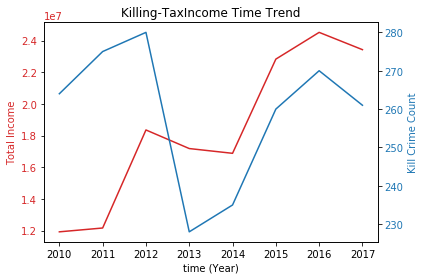

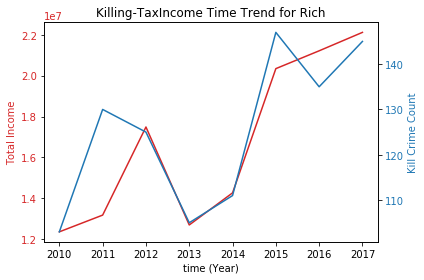

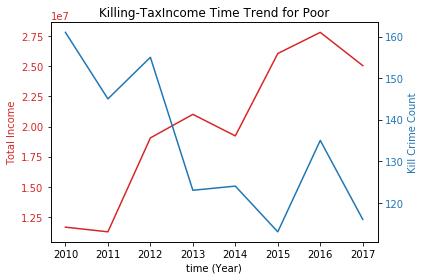

In [19]:
def drawTaxCrimeTimeTrend(data,title):
    XYear = [i+2010 for i in range(8)]
    yIncome = data.groupby("YEAR").mean()["Total Tax Liability"].tolist()
#     print(yIncome)
    yCrimeCount = data.groupby("YEAR").count()["DATE OCC"].tolist()
#     print(yCrimeCount) 
    import numpy as np
    import matplotlib.pyplot as plt

    # fig, ax1 = plt.subplots()
    fig, income = plt.subplots()


    color = 'tab:red'
    income.set_xlabel('time (Year)')
    income.set_ylabel('Total Income', color=color)
    income.plot(XYear, yIncome, color=color)
    income.tick_params(axis='y', labelcolor=color)

    crimeCount = income.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    crimeCount.set_ylabel('Kill Crime Count', color=color)  # we already handled the x-label with ax1
    crimeCount.plot(XYear, yCrimeCount, color=color)
    crimeCount.tick_params(axis='y', labelcolor=color)
    income.set_title(title)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    # tmp.groupby("YEAR")
drawTaxCrimeTimeTrend(killCrimeCombineTax,"Killing-TaxIncome Time Trend")
drawTaxCrimeTimeTrend(killCrimeCombineRichTax,"Killing-TaxIncome Time Trend for Rich")
drawTaxCrimeTimeTrend(killCrimeCombinePoorTax,"Killing-TaxIncome Time Trend for Poor")

The x-axis is the time of year from 2010 to 2017, the red line is the total tax income in LA, and its axis is on the left-hand side. The blue line is the number of crime happened for homicide. As we can see from the first graph(the overall one), it is hard to say there's a relationship between the two, because as the tax income increase, many underlying factors may affect the number of crimes happed.

However, if we divided the area into the rich and poor according to the average tax-income of that area. There is some relationship between these two. For the rich people graph, we found that the number of crimes for homicide is proportional to the tax income which means as the income goes up, the number of crimes also goes up. We think that, for rich areas, there is already a better public security comparing to the poor people. But as the tax income increases, there will be more rich people and that lead to the number of crime increase. While for the poor area which is shown in the third graph, the result is the opposite. The number of crimes for homicide is inversely proportional to the tax income. We assume that as the tax income goes up, this area has better public security, so the number of crimes will decrease.

Then, to verify our conclusion above, we change to another crime type which is robbery(crime code = 210). Because we think that robbery may have a stronger relationship with tax income.

In [17]:
RobCrime = df[df["Crm Cd"] == 210]
RobCrime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,DATE
11,100100522,01/15/2010 12:00:00 AM,01/14/2010 12:00:00 AM,2000,1,Central,158,1,210,ROBBERY,...,Adult Other,210.0,NaN,NaN,NaN,ALAMEDA ST,7TH ST,34.0350,-118.2386,2010-01-14
14,100100531,01/16/2010 12:00:00 AM,01/15/2010 12:00:00 AM,2030,1,Central,127,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1ST,LOS ANGELES,34.0515,-118.2424,2010-01-15
17,100100553,01/23/2010 12:00:00 AM,01/23/2010 12:00:00 AM,1100,1,Central,166,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,600 SAN JULIAN ST,NaN,34.0428,-118.2461,2010-01-23
19,100100561,01/26/2010 12:00:00 AM,01/26/2010 12:00:00 AM,1820,1,Central,119,1,210,ROBBERY,...,Adult Arrest,210.0,NaN,NaN,NaN,800 N ALAMEDA ST,NaN,34.0563,-118.2374,2010-01-26
41,100100630,02/15/2010 12:00:00 AM,02/15/2010 12:00:00 AM,100,1,Central,123,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1ST ST,HILL ST,34.0544,-118.2466,2010-02-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087122,190719964,11/24/2019 12:00:00 AM,11/24/2019 12:00:00 AM,45,7,Wilshire,749,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,CRENSHAW BL,OLYMPIC BL,34.0547,-118.3230,2019-11-24
2087140,190209661,04/14/2019 12:00:00 AM,04/14/2019 12:00:00 AM,300,2,Rampart,257,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,1500 WILSHIRE BL,NaN,34.0546,-118.2684,2019-04-14
2087152,191706836,03/04/2019 12:00:00 AM,03/04/2019 12:00:00 AM,710,17,Devonshire,1776,1,210,ROBBERY,...,Invest Cont,210.0,998.0,NaN,NaN,9600 GERALD AV,NaN,34.2453,-118.4948,2019-03-04
2087193,190404513,01/12/2019 12:00:00 AM,01/12/2019 12:00:00 AM,1620,4,Hollenbeck,467,1,210,ROBBERY,...,Invest Cont,210.0,NaN,NaN,NaN,4TH ST,MATHEWS,34.0401,-118.2106,2019-01-12


Also, use the same search engine we mentioned above to add the zip code column.
This part of the code will take a long time for 2-3 hours. So we already do this and save the data as RobCrime.csv.

In [ ]:
search = SearchEngine(simple_zipcode=False)

count = 0
def test_zip(row):
    try:
        result = search.by_coordinates(row["LAT"], row["LON"], radius=10, returns=1)
        global count
        count = count + 1
        if count % 1000 == 0:
            print("finished 100")
        return result[0].zipcode
    except:
        result = -1
        return result

RobCrime["ZIP_CODE"] = RobCrime.apply(test_zip, axis = 1)
RobCrime.to_csv("RobCrime.csv")

In [20]:
RobCrime = pd.read_csv('RobCrime.csv')
RobCrime["DATE OCC"] = pd.to_datetime(RobCrime['DATE OCC'])
RobCrime['YEAR']=RobCrime["DATE OCC"].dt.year

FileNotFoundError: [Errno 2] File b'RobCrime.csv' does not exist: b'RobCrime.csv'

In [25]:
reviseTexIncome = pd.read_csv("revised_tax_income.csv")
reviseTexIncome

,Taxable Year,Zip Code,State,City,County,Returns,CA AGI,Total Tax Liability,CountyLatitude,CountyLongitude,Geo County,Geo City,Geo ZipCode
0,2017,91775,CA,San Gabriel,Los Angeles,11301,896920720,39885616,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.10722900000002 34.099203),NaN
1,2017,90001,CA,Los Angeles,Los Angeles,21596,633896704,5884996,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.24915400000002 33.973252)
2,2017,90002,CA,Los Angeles,Los Angeles,19915,576005270,5042436,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.247877 33.949079)
3,2017,91755,CA,Monterey Park,Los Angeles,15063,636889907,19992841,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.127542 34.062407),POINT (-118.11527900000002 34.048584)
4,2017,90213,CA,Beverly Hills,Los Angeles,426,63811566,4916474,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.40467899999999 34.080294),POINT (-118.40467899999999 34.080294)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,2010,91385,CA,Valencia,Los Angeles,157,27221900,1232517,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.564722 34.389444),POINT (-118.56 34.39)
2745,2010,90095,CA,Los Angeles,Los Angeles,52,5601348,376048,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.442809 34.070475)
2746,2010,90280,CA,South Gate,Los Angeles,36513,1084164598,16254125,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.206087 33.954211),POINT (-118.19452000000001 33.943676)
2747,2010,90101,CA,Los Angeles,Los Angeles,14,536896,13819,34.059483,-118.242048,POINT (-118.24204800000001 34.0594833),POINT (-118.243344 34.052238),POINT (-118.243344 34.052238)


Also, we separate the area into the rich and the poor.

In [26]:
RobCrimeCombimeTax = RobCrime.merge(reviseTexIncome, left_on=["YEAR","ZIP_CODE"], right_on=["Taxable Year","Zip Code"])

# Rich 
RobCrimeCombimeRichTax = RobCrimeCombimeTax[RobCrimeCombimeTax["Returns"] > 20000]

# Poor
RobCrimeCombimePoorTax = RobCrimeCombimeTax[RobCrimeCombimeTax["Returns"] < 15000]

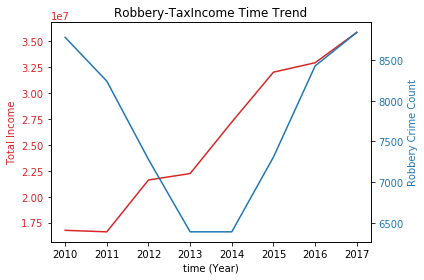

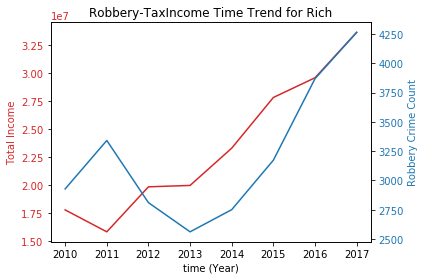

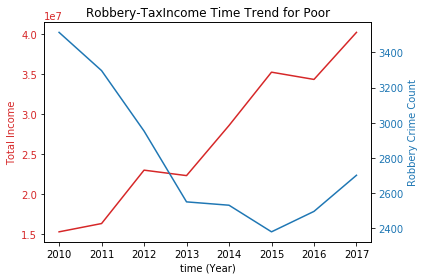

In [28]:
def drawTaxCrimeTimeTrend(data,title):    
    XYear = [i+2010 for i in range(8)]

    yIncome = data.groupby("YEAR").mean()["Total Tax Liability"].tolist()
#     print(yIncome)
    yCrimeCount = data.groupby("YEAR").count()["DATE OCC"].tolist()
#     print(yCrimeCount)

    # fig, ax1 = plt.subplots()
    fig, income = plt.subplots()

    color = 'tab:red'
    income.set_xlabel('time (Year)')
    income.set_ylabel('Total Income', color=color)
    income.plot(XYear, yIncome, color=color)
    income.tick_params(axis='y', labelcolor=color)

    crimeCount = income.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    crimeCount.set_ylabel('Robbery Crime Count', color=color)  # we already handled the x-label with ax1
    crimeCount.plot(XYear, yCrimeCount, color=color)
    crimeCount.tick_params(axis='y', labelcolor=color)
    income.set_title(title)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
# tmp.groupby("YEAR")

drawTaxCrimeTimeTrend(RobCrimeCombimeTax,"Robbery-TaxIncome Time Trend")
drawTaxCrimeTimeTrend(RobCrimeCombimeRichTax,"Robbery-TaxIncome Time Trend for Rich")
drawTaxCrimeTimeTrend(RobCrimeCombimePoorTax,"Robbery-TaxIncome Time Trend for Poor")


The graph above can perfectly match our conclusion above, in which the number of crimes for robbery is proportional to the tax income in the rich area, and is inversely proportional to the tax income in the poor area.